# Capstone Project One
This workbook contains analysis for the capstone project one as part of the machine learning zoomcap

## Load the library need for the project
Below all the libraries needed for the project are loaded. 

In [94]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## read the data for the analysis
Below the data is load and some preliminary analysis perform. 

In [6]:
data = pd.read_csv("diamonds.csv")

In [7]:
## Have a look at the top six rows of the data
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
## Check the descriptions of the data
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
## make the columns the consistent, all in small leters
data.columns = data.columns.str.lower().str.replace(' ', '_')

string_columns = list(data.dtypes[data.dtypes == 'object'].index)


for col in string_columns:
    data[col] = data[col] = data[col].str.lower().str.replace(" ", "_")

In [11]:
## Drop customerID
del data['unnamed:_0']

In [12]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,premium,e,si1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,good,e,vs1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,premium,i,vs2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,good,j,si2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
## Check if the data has some NA values. [There are no NA values]
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())
    print()

carat
[0.23 0.21 0.29 0.31 0.24]
273

cut
['ideal' 'premium' 'good' 'very_good' 'fair']
5

color
['e' 'i' 'j' 'h' 'f']
7

clarity
['si2' 'si1' 'vs1' 'vs2' 'vvs2']
8

depth
[61.5 59.8 56.9 62.4 63.3]
184

table
[55. 61. 65. 58. 57.]
127

price
[326 327 334 335 336]
11602

x
[3.95 3.89 4.05 4.2  4.34]
554

y
[3.98 3.84 4.07 4.23 4.35]
552

z
[2.43 2.31 2.63 2.75 2.48]
375



In [15]:
##### Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

<Axes: xlabel='price', ylabel='Count'>

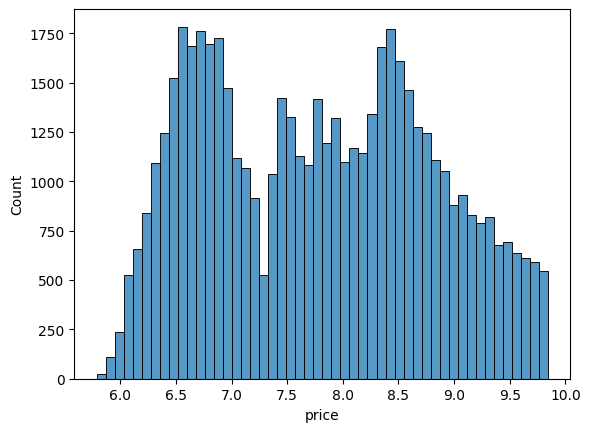

In [16]:
sns.histplot(np.log1p(data.price), bins=50)

/var/folders/js/95x7pm0d46d9qsgdhmvy56400000gn/T/ipykernel_50203/1445254280.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(bins=5, ax=ax, layout=(3, 3), column=['carat', 'depth', 'table', 'price', 'x', 'y', 'z'])


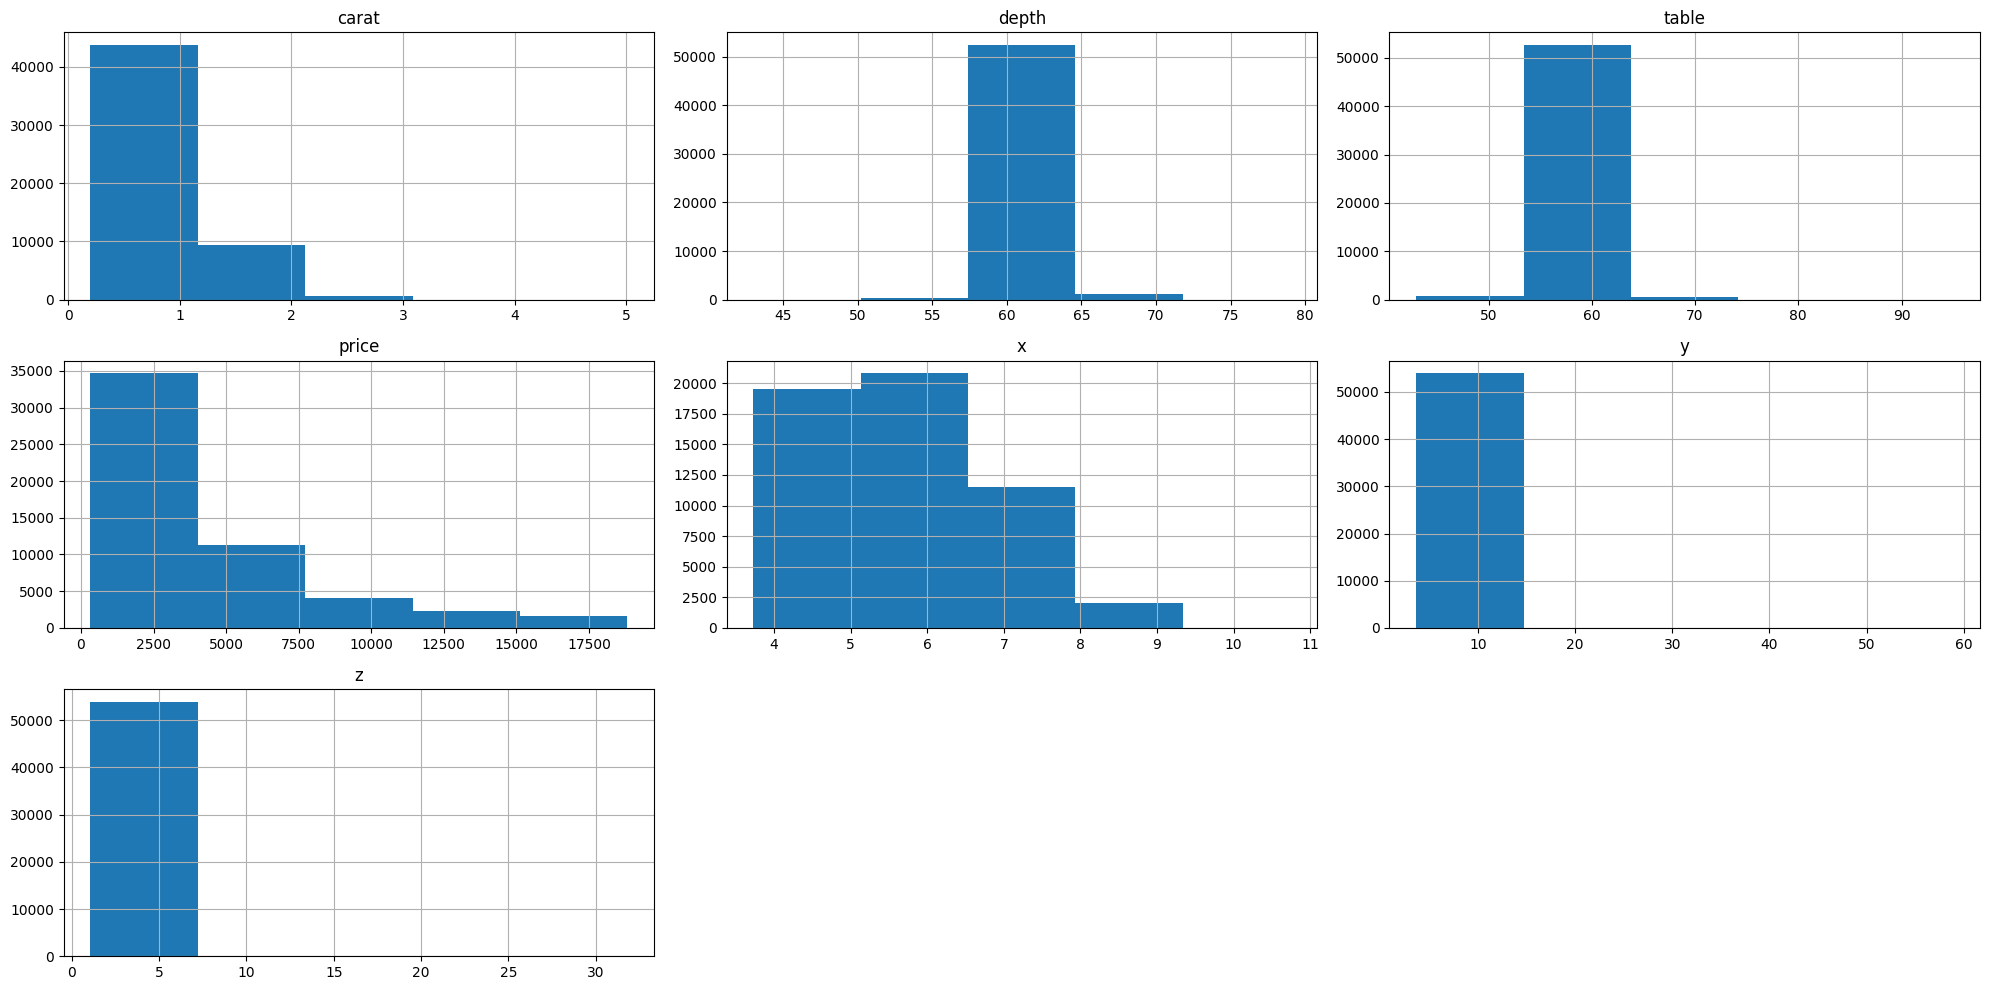

In [17]:
## Plot all the numerical variables
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
data.hist(bins=5, ax=ax, layout=(3, 3), column=['carat', 'depth', 'table', 'price', 'x', 'y', 'z'])
plt.tight_layout()
plt.show()

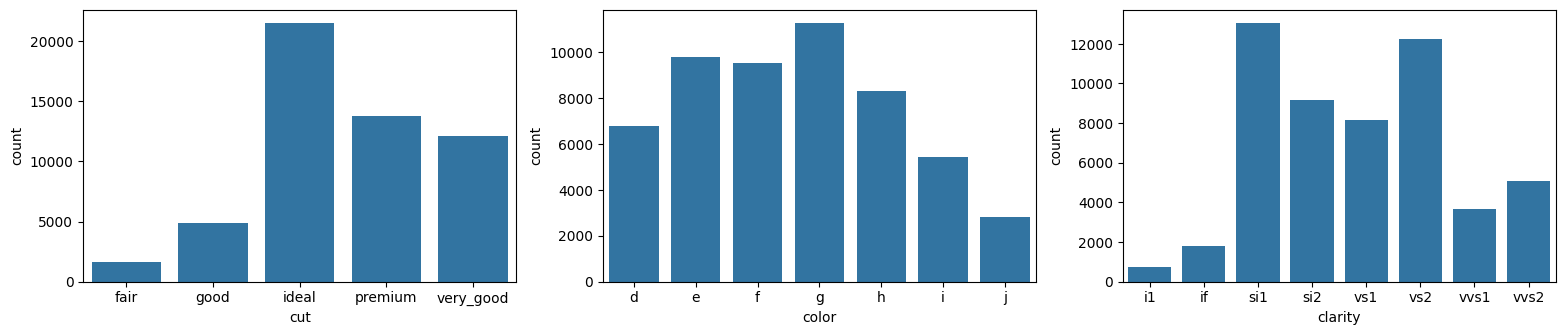

In [18]:
## Look at the destribution of the caterogical variables 
cat_cols = data.select_dtypes('O')
i = 1
plt.figure(figsize=(19, 12))
for c in cat_cols.columns:
    plt.subplot(3, 3, i)
    sns.countplot(x=data[c].sort_values())
    i+=1

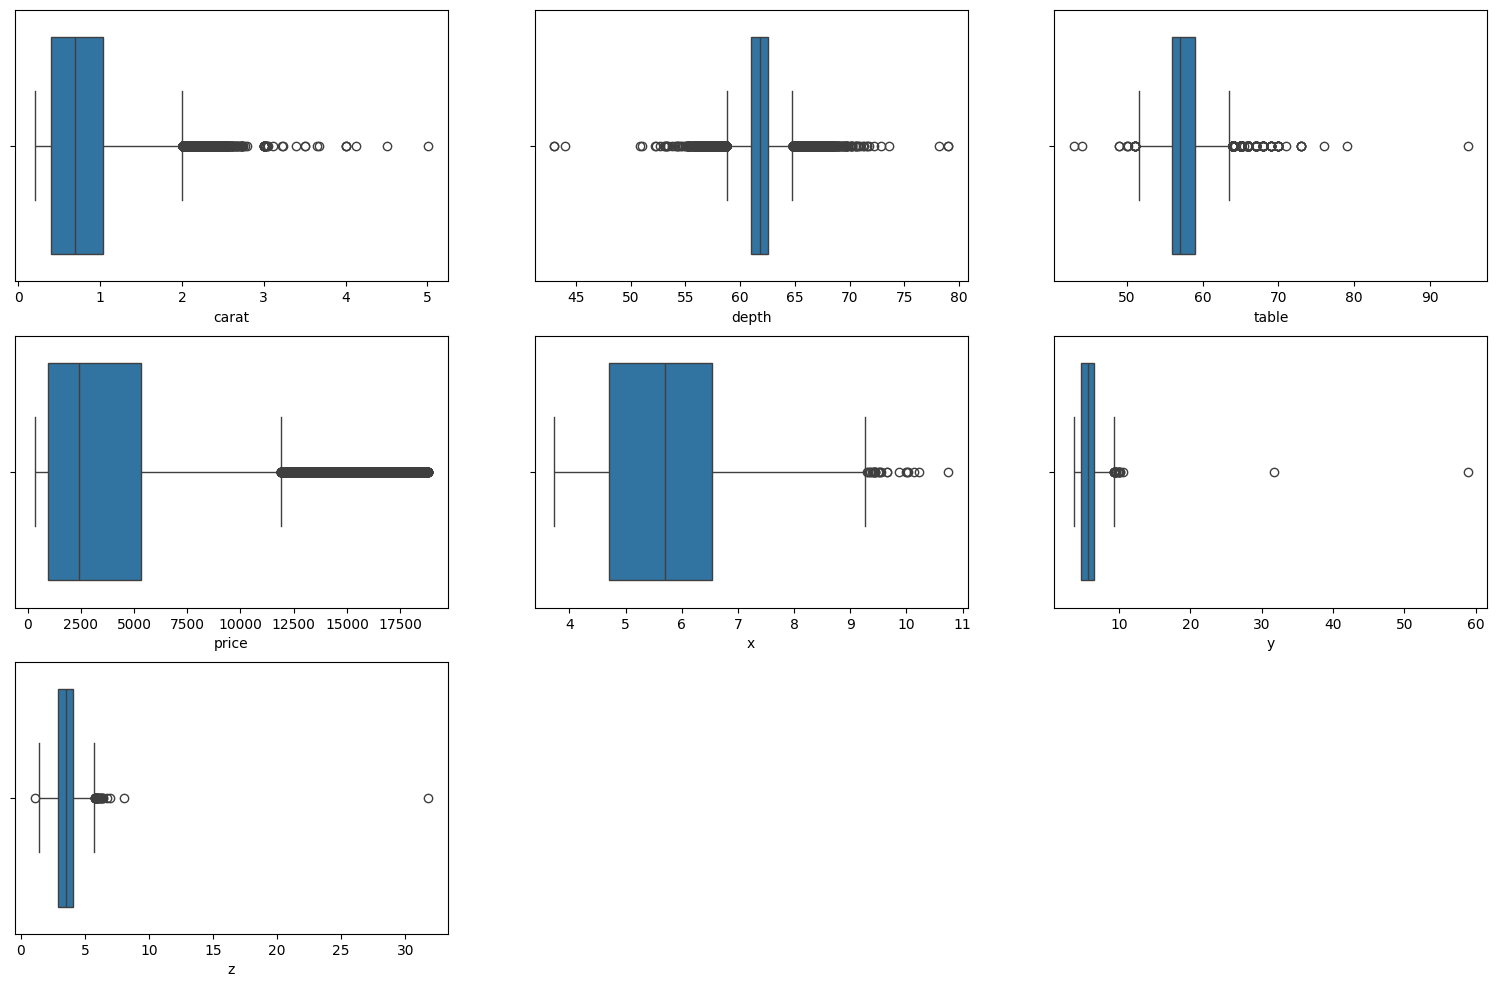

In [19]:
## Boxplof the numerical variable. There seems to be some outlier for the x values
num_cols = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[c])
    i+=1

### Encoding ordinal variables
Endode the varibale for the data visualisation

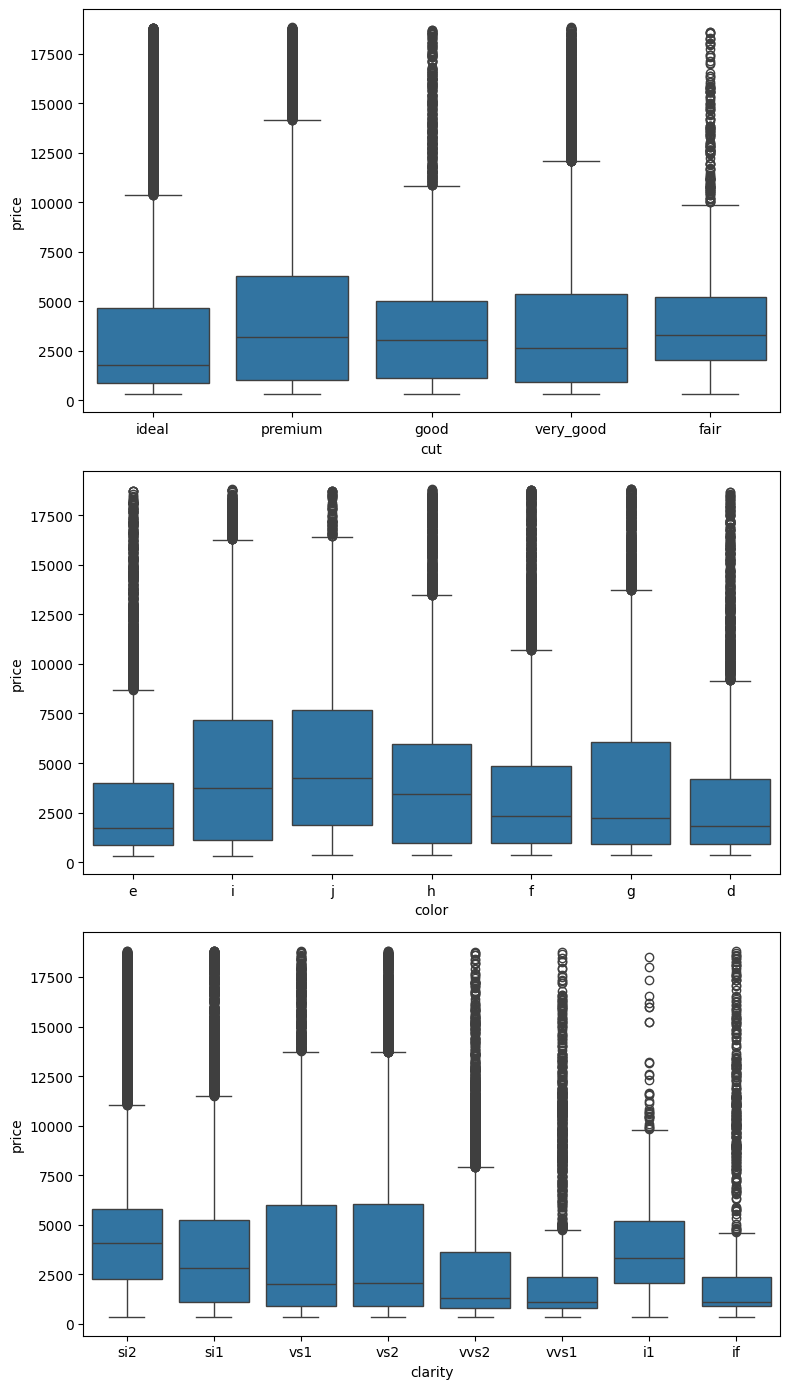

In [20]:
plt.figure(figsize=(8, 14))
plt.subplot(3,1,1)
sns.boxplot(x = 'cut', y = 'price', data = data)
plt.subplot(3,1,2)
sns.boxplot(x = 'color', y = 'price', data = data)
plt.subplot(3,1,3)
sns.boxplot(x = 'clarity', y = 'price', data = data)
plt.tight_layout()
plt.show()

In [39]:
data1 = data.copy()

data1['cut'] = data1['cut'].map({'fair':0, 'good':1, 'very_good':2, 'premium':3, 'ideal':4})
data1['color'] = data1['color'].map({'j':0, 'i':1, 'h':2, 'g':3, 'f':4, 'e':5, 'd':6})
data1['clarity'] = data1['clarity'].map({'i1':0, 'si2':1, 'si1':2, 'vs2':3, 'vs1':4, 'vvs2':5, 'vvs1':6, 'if':7})



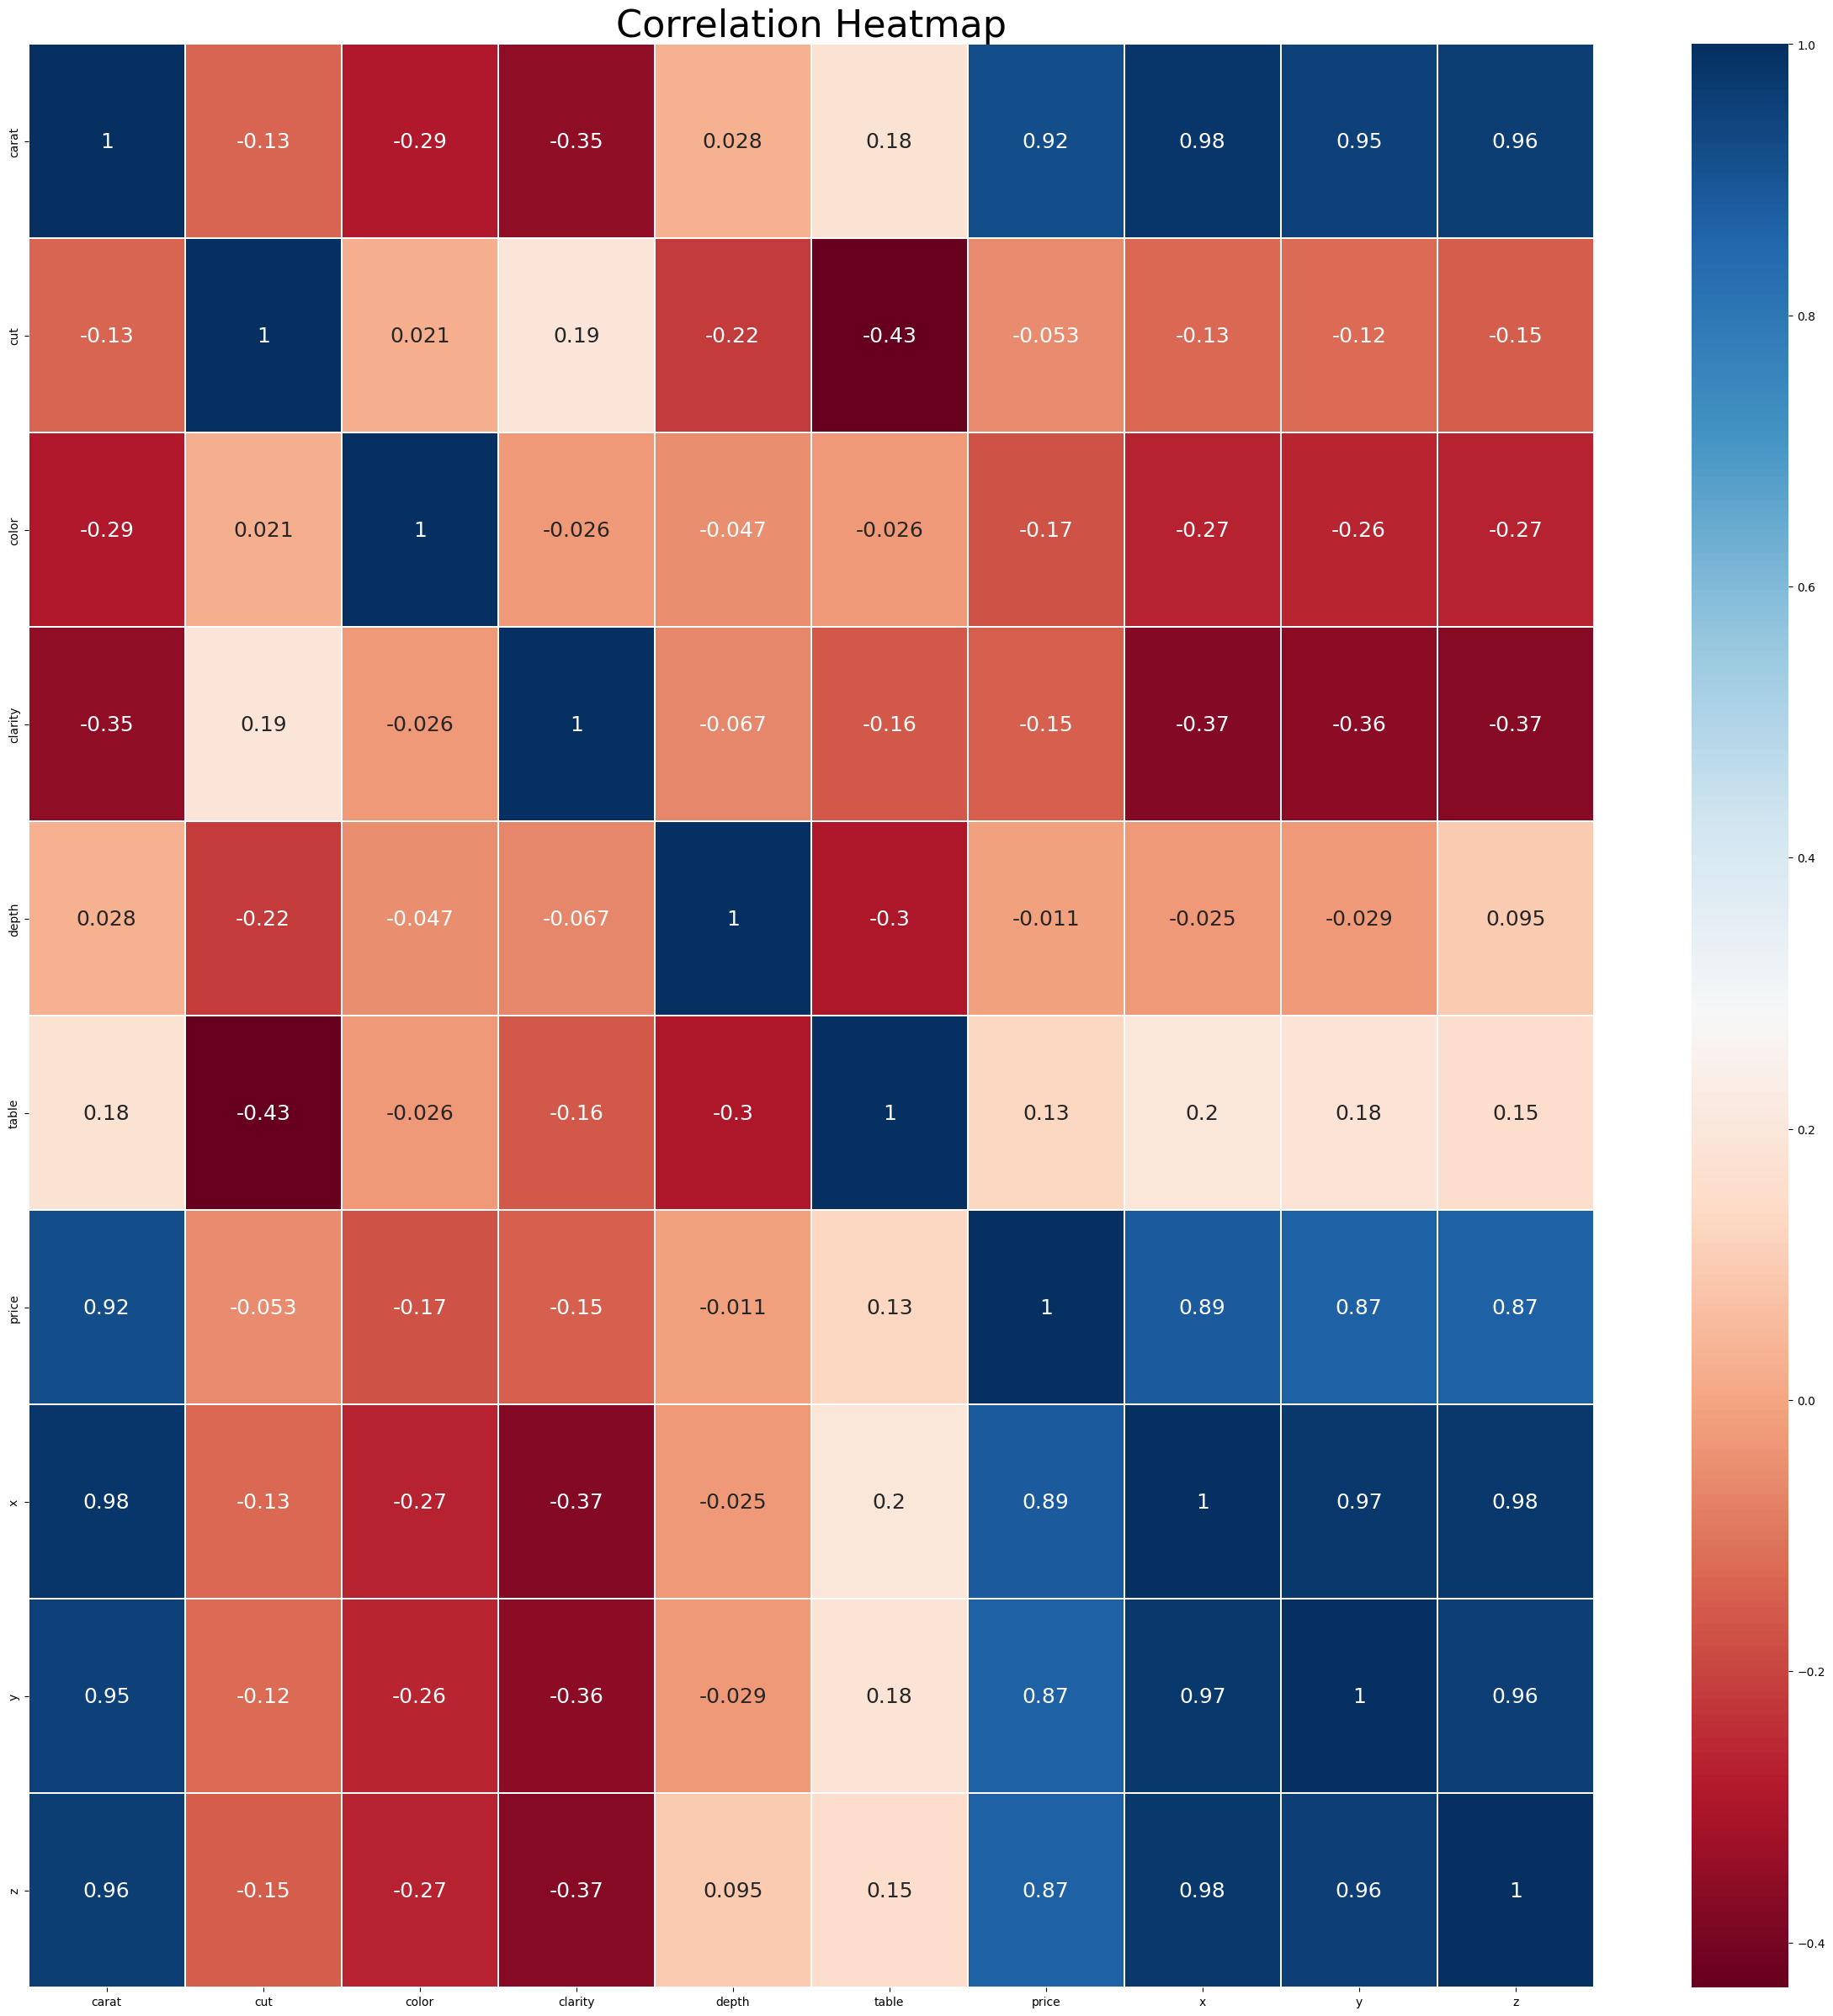

In [40]:
plt.figure(figsize=(30,30));
sns.heatmap(data1.corr(),annot=True,cmap='RdBu',linewidth=0.01, annot_kws={'size': 18});
plt.title('Correlation Heatmap',fontsize=32,fontweight=5);


### Split the data for the prediction

In [41]:
df_full_train, df_test = train_test_split(data1, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)


y_train = df_train.price.values
y_test = df_test.price.values
y_val = df_val.price.values

del df_train['price']
del df_test['price']
del df_val['price']

In [42]:
df_test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.28,2,3,3,61.3,57.0,4.21,4.24,2.59
1,1.29,0,2,0,67.7,62.0,6.69,6.59,4.50
2,1.52,2,6,2,60.6,57.8,7.40,7.46,4.51
3,0.37,4,4,4,61.0,55.0,4.66,4.69,2.85
4,0.33,4,4,6,61.4,55.0,4.47,4.52,2.76
...,...,...,...,...,...,...,...,...,...
10779,0.71,2,5,2,63.1,59.0,5.75,5.62,3.59
10780,2.19,1,1,1,63.7,57.0,8.23,8.19,5.23
10781,0.75,4,5,2,61.4,57.0,5.82,5.87,3.59
10782,0.90,2,4,2,63.2,56.0,6.16,6.09,3.87


In [58]:
model1_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

model2_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

model3_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])

model4_xb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

In [62]:
pipelines = [model1_lr, model2_dt, model3_rf, model4_xb]

pipelines_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(df_train, y_train)

In [67]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, df_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipelines_dict[i], cv_score.mean()))

LinearRegression: -1354.443816 
DecisionTree: -758.949800 
RandomForest: -556.343349 
XGBRegressor: -562.395861 


In [93]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, df_val,y_val,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipelines_dict[i], cv_score.mean()))

LinearRegression: -1178.073154 
DecisionTree: -812.017532 
RandomForest: -592.277080 
XGBRegressor: -599.862959 
